In [205]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from dython.nominal import associations

import warnings 
warnings.filterwarnings("ignore")

csv_path = "diabetes.csv"
df = pd.read_csv(csv_path)
df = df.drop_duplicates()
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [128]:
asso_df = associations(df, nominal_columns="all", plot=False)
corr_matrix = asso_df["corr"]
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix including Categorical Features")
plt.show()

In [129]:
sns.pairplot(
    data=df,
    hue="diabetes",
    palette="seismic",
    height=1.5,
    aspect=1.5,
    diag_kind="kde"
)
plt.show()

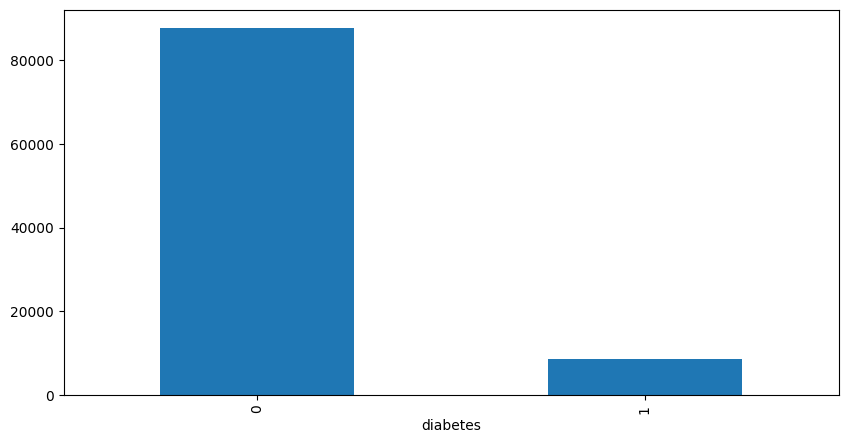

In [130]:
plt.figure(figsize=(10, 5))
df["diabetes"].value_counts().plot(kind="bar")
plt.show()

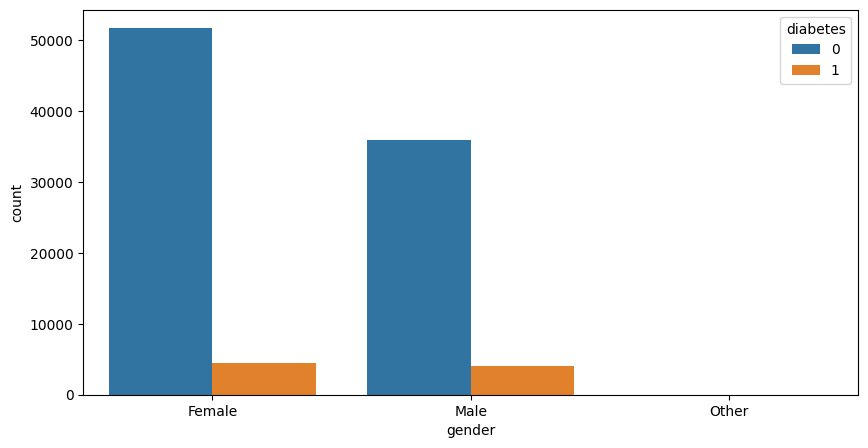

In [131]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="gender", hue="diabetes")
plt.show()

In [132]:
df["gender"].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [133]:
other_i = df[df["gender"] == "Other"].index
df = df.drop(other_i)
df["gender"].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

In [134]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


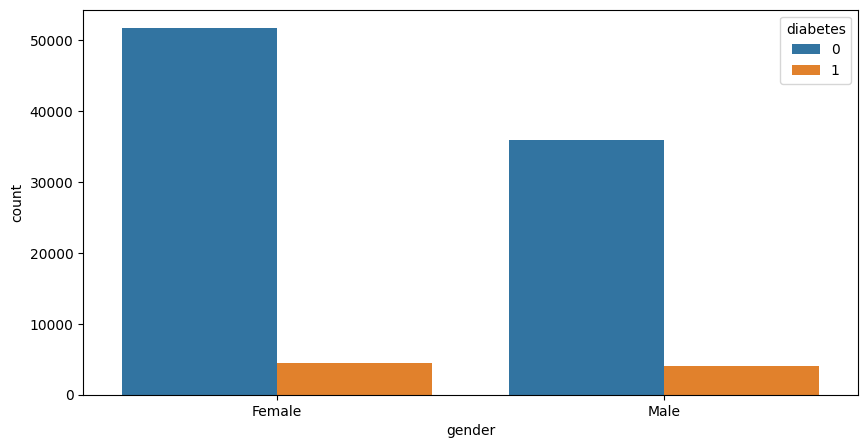

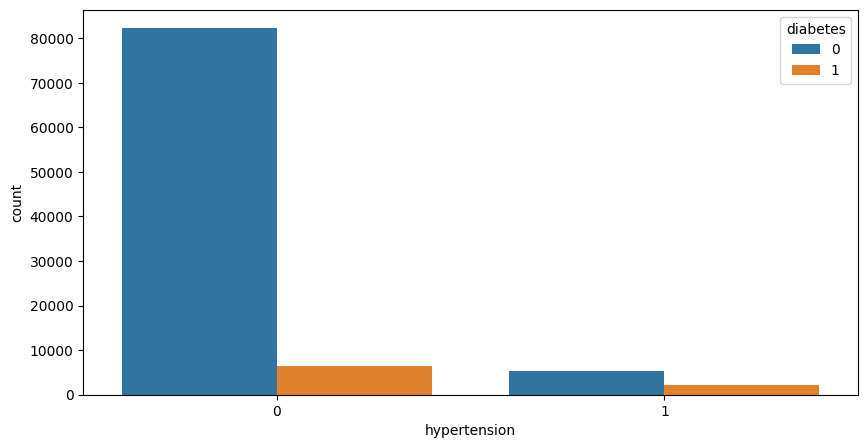

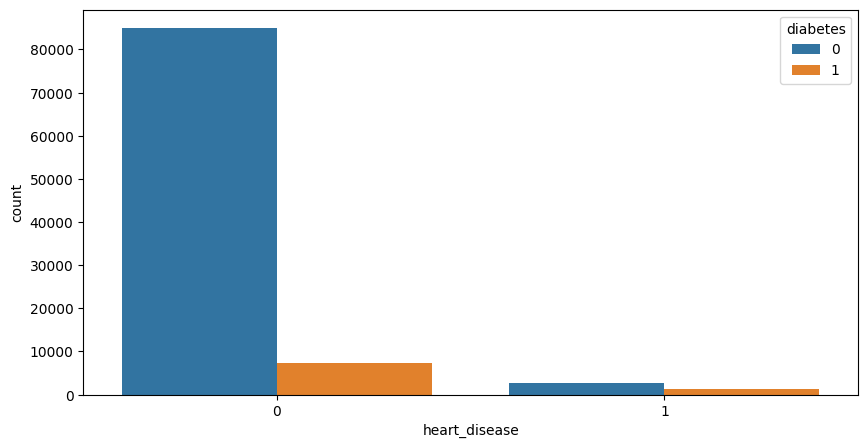

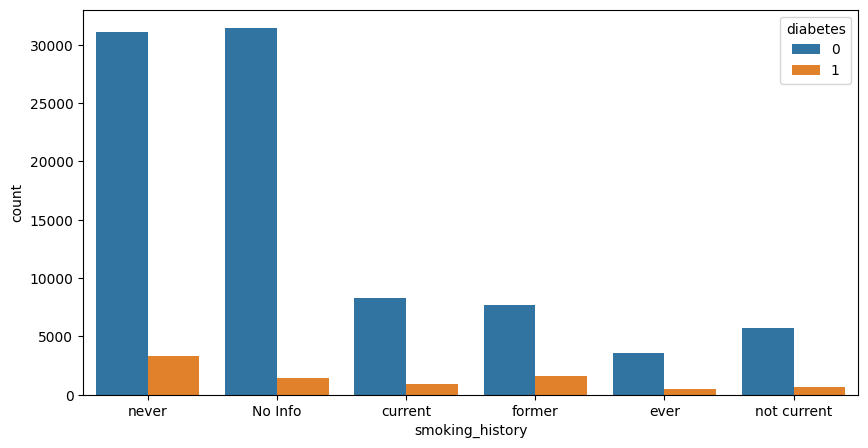

In [135]:
fea = ["gender", "hypertension", "heart_disease", "smoking_history"]

for col in fea:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue="diabetes")
    plt.show()

In [136]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


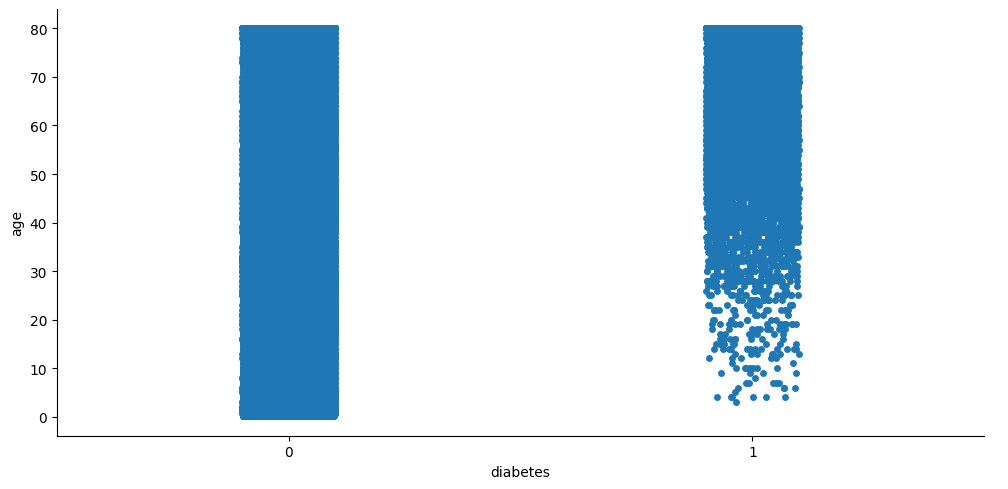

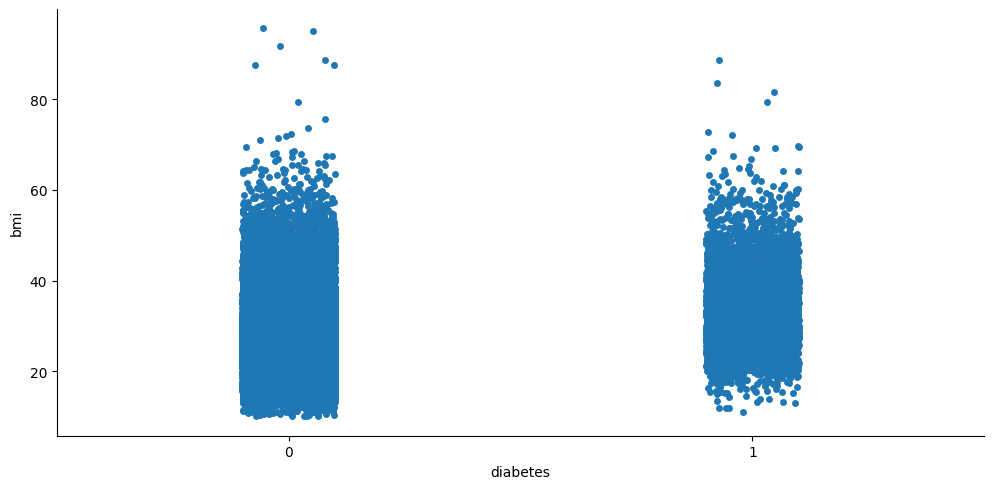

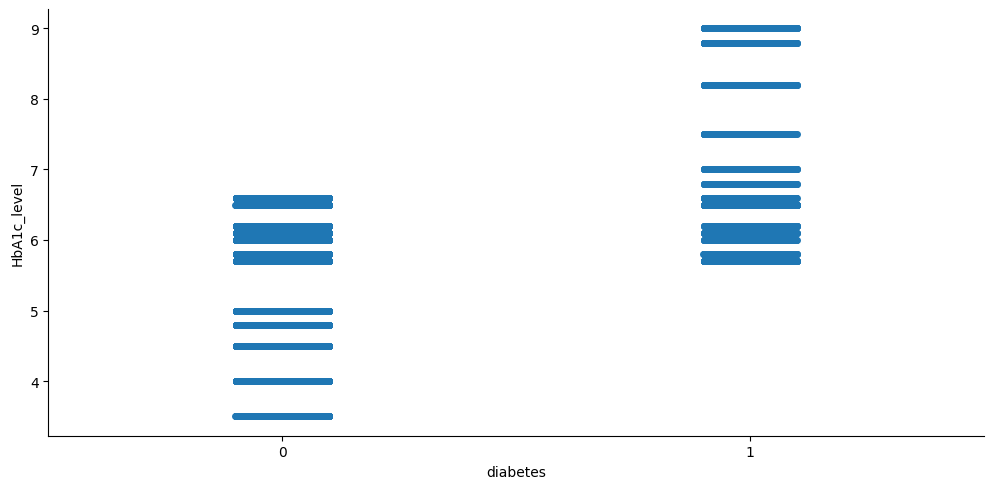

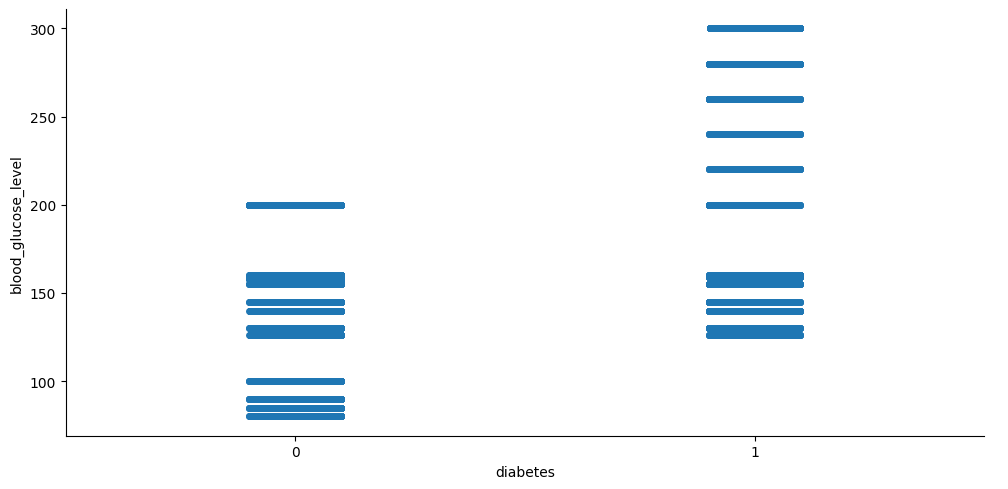

In [137]:
fea = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

for col in fea:
    sns.catplot(x="diabetes", y=col, data=df, height=5, aspect=2)
    plt.show()

In [138]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


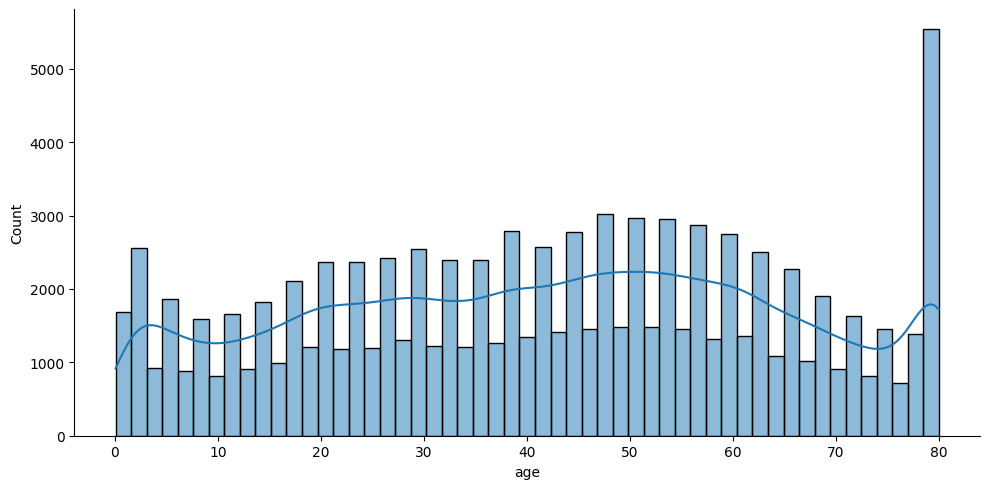

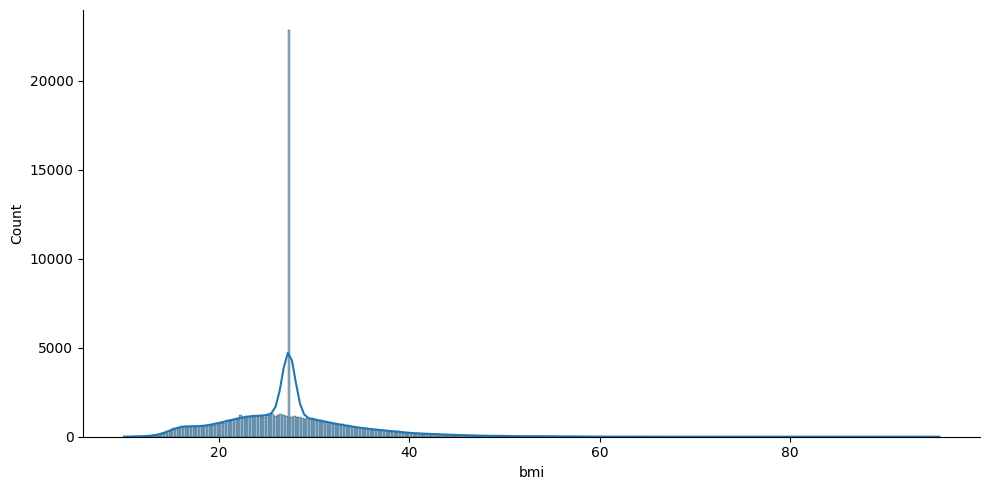

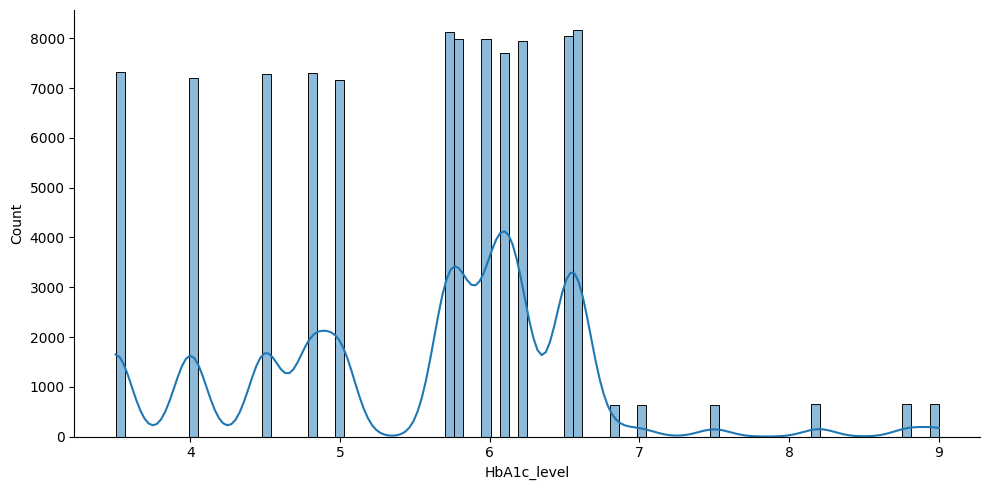

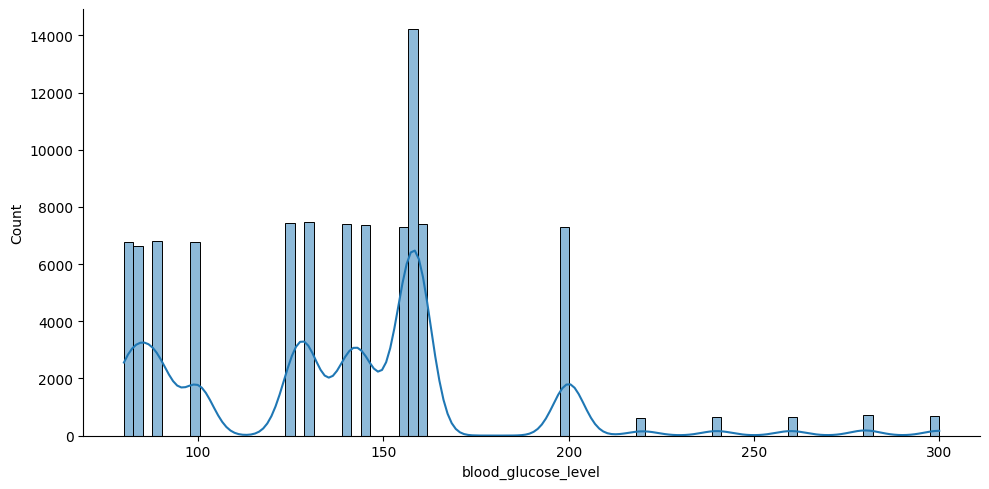

In [139]:
fea = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

for col in fea:
    sns.displot(df[col], kde=True, height=5, aspect=2)
    plt.show()

In [140]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [206]:
from sklearn.preprocessing import LabelEncoder

fea_label = ["gender", "smoking_history"]

df_label = df.copy()
df_label[fea_label] = df_label[fea_label].apply(LabelEncoder().fit_transform)
df_label.head()



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [142]:
df_label.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,96128.0,0.415769,0.492857,0.00,0.0,0.00,1.00,1.00
age,96128.0,41.796617,22.463329,0.08,24.0,43.00,59.00,80.00
hypertension,96128.0,0.077615,0.267567,0.00,0.0,0.00,0.00,1.00
heart_disease,96128.0,0.040810,0.197851,0.00,0.0,0.00,0.00,1.00
smoking_history,96128.0,2.231015,1.879861,0.00,0.0,3.00,4.00,5.00
bmi,96128.0,27.321450,6.767811,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96128.0,5.532633,1.073225,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96128.0,138.218001,40.911190,80.00,100.0,140.00,159.00,300.00
diabetes,96128.0,0.088237,0.283640,0.00,0.0,0.00,0.00,1.00


In [143]:
df_label["gender"].value_counts()

gender
0    56161
1    39967
Name: count, dtype: int64

In [207]:
from outliers_helper import iqr_method

features = df_label.columns.values

iqr_method(df=df_label, n=1, features=features, drop_outliers=False)

Total number of outliers is: 8482


In [145]:
df_label = iqr_method(df=df_label, n=1, features=features, drop_outliers=True)
len(df_label)

Total number of outliers is: 8482


89585

In [146]:
df_label = df_label.sample(frac=1).reset_index(drop=True)
df_label.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,57.0,0,0,4,29.90,5.7,158,0
1,1,38.0,0,0,1,27.32,5.8,140,0
2,0,53.0,0,0,0,20.25,5.7,90,0
3,0,30.0,0,0,3,22.20,6.1,160,0
4,0,63.0,0,0,4,31.75,5.8,160,0


In [147]:
print(df_label["age"].max())
print(df_label["age"].min())

80.0
0.08


In [208]:
bins = [0, 6, 21, 55, 80]
labels = ["very young", "young", "medium", "old"]


binning = pd.cut(df_label["age"], bins=bins, labels=labels)
df_label["ages_bins"] = binning
df_label.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,ages_bins
0,0,80.0,0,1,4,25.19,6.6,140,0,old
1,0,54.0,0,0,0,27.32,6.6,80,0,medium
2,1,28.0,0,0,4,27.32,5.7,158,0,medium
3,0,36.0,0,0,1,23.45,5.0,155,0,medium
4,1,76.0,1,1,1,20.14,4.8,155,0,old


In [149]:
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']

binning = pd.cut(df_label["bmi"], bins=bins, labels=labels)
df_label["bmi_bins"] = binning 
df_label.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,ages_bins,bmi_bins
0,0,57.0,0,0,4,29.90,5.7,158,0,old,Overweight
1,1,38.0,0,0,1,27.32,5.8,140,0,medium,Overweight
2,0,53.0,0,0,0,20.25,5.7,90,0,medium,Normal weight
3,0,30.0,0,0,3,22.20,6.1,160,0,medium,Normal weight
4,0,63.0,0,0,4,31.75,5.8,160,0,old,Obesity


In [150]:
df_label[["ages_bins", "bmi_bins"]] = df_label[["ages_bins", "bmi_bins"]].apply(LabelEncoder().fit_transform)
df_label.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,ages_bins,bmi_bins
0,0,57.0,0,0,4,29.90,5.7,158,0,1,2
1,1,38.0,0,0,1,27.32,5.8,140,0,0,2
2,0,53.0,0,0,0,20.25,5.7,90,0,0,0
3,0,30.0,0,0,3,22.20,6.1,160,0,0,0
4,0,63.0,0,0,4,31.75,5.8,160,0,1,1


In [151]:
df_label.to_csv("diabetes_prep.csv")

In [152]:
from sklearn.feature_selection import SelectKBest, chi2 

X = df_label.drop("diabetes", axis=1)
y = df_label["diabetes"]

selected_features = SelectKBest(chi2, k='all').fit(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Squared Score': selected_features.scores_
}).sort_values(by='Chi-Squared Score', ascending=False)

print(feature_scores)

threshold = 100  
selected = feature_scores[feature_scores['Chi-Squared Score'] > threshold]
print("\nSelected Features based on threshold:")
print(selected)

selected_features_list = feature_scores[feature_scores['Chi-Squared Score'] > threshold]["Feature"]
X = X[selected_features_list]
X.head()

               Feature  Chi-Squared Score
1                  age       28381.013677
7  blood_glucose_level       25742.727087
5                  bmi         767.032792
6          HbA1c_level         741.576479
4      smoking_history         384.143839
2         hypertension         152.295967
8            ages_bins         135.612337
3        heart_disease          69.943846
0               gender          30.276872
9             bmi_bins           0.926185

Selected Features based on threshold:
               Feature  Chi-Squared Score
1                  age       28381.013677
7  blood_glucose_level       25742.727087
5                  bmi         767.032792
6          HbA1c_level         741.576479
4      smoking_history         384.143839
2         hypertension         152.295967
8            ages_bins         135.612337


,age,blood_glucose_level,bmi,HbA1c_level,smoking_history,hypertension,ages_bins
0,57.0,158,29.90,5.7,4,0,1
1,38.0,140,27.32,5.8,1,0,0
2,53.0,90,20.25,5.7,0,0,0
3,30.0,160,22.20,6.1,3,0,0
4,63.0,160,31.75,5.8,4,0,1


In [153]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(71668, 17917, 71668, 17917)

In [166]:
from imblearn.over_sampling import SMOTE, RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [168]:
from imblearn.over_sampling import SMOTE, RandomOverSampler 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from evaluate_helper import calculate_metrics

experiments_svc = [
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LinearSVC(random_state=42, class_weight="balanced"))
    ]),
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LinearSVC(random_state=42, class_weight={0:1, 1:5}))
    ]),
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LinearSVC(random_state=42, class_weight={0:1, 1:10}))
    ]),
    LinearSVC(random_state=42, class_weight="balanced"),
    LinearSVC(random_state=42, class_weight={0:1, 1:5}),
    LinearSVC(random_state=42, class_weight={0:1, 1:10}),
]

dataframes_svc_smote = []

for i, experiment in enumerate(experiments_svc):
    experiment.fit(X_train_smote, y_train_smote)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_smote_{i}_svc", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_svc_smote.append(df)

df_svc_smote = pd.concat(dataframes_svc_smote)
df_svc_smote

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_smote_0_svc,0.828933,0.568640,0.564803,0.837202,No Diabetes,0.994126,0.828390,0.903722,Diabetes,0.135480,0.846014,0.233558
0,experiment_smote_1_svc,0.648993,0.462919,0.539173,0.809270,No Diabetes,0.999009,0.638468,0.779046,Diabetes,0.079337,0.980072,0.146791
0,experiment_smote_2_svc,0.570799,0.420395,0.533279,0.776824,No Diabetes,0.999793,0.557270,0.715649,Diabetes,0.066764,0.996377,0.125142
0,experiment_smote_3_svc,0.520232,0.392368,0.530065,0.751614,No Diabetes,0.999886,0.505039,0.671105,Diabetes,0.060245,0.998188,0.113632
0,experiment_smote_4_svc,0.850198,0.584564,0.571229,0.835895,No Diabetes,0.993346,0.851137,0.916760,Diabetes,0.149111,0.820652,0.252368
0,experiment_smote_5_svc,0.551655,0.409796,0.531940,0.766947,No Diabetes,0.999786,0.537518,0.699150,Diabetes,0.064095,0.996377,0.120442


In [169]:
dataframes_svc_ros = []

for i, experiment in enumerate(experiments_svc):
    experiment.fit(X_train_ros, y_train_ros)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_ros_{i}_svc", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_svc_ros.append(df)

df_svc_ros = pd.concat(dataframes_svc_ros)
df_svc_ros

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_ros_0_svc,0.825138,0.567737,0.565136,0.845769,No Diabetes,0.994923,0.823783,0.901301,Diabetes,0.135349,0.867754,0.234173
0,experiment_ros_1_svc,0.627728,0.451132,0.537162,0.799177,No Diabetes,0.999067,0.616470,0.762464,Diabetes,0.075257,0.981884,0.139799
0,experiment_ros_2_svc,0.540660,0.403690,0.531219,0.761275,No Diabetes,0.999781,0.526173,0.689481,Diabetes,0.062657,0.996377,0.117899
0,experiment_ros_3_svc,0.322487,0.273013,0.521748,0.650475,No Diabetes,1.000000,0.300950,0.462662,Diabetes,0.043495,1.000000,0.083365
0,experiment_ros_4_svc,0.900541,0.629710,0.594814,0.820647,No Diabetes,0.990803,0.905788,0.946390,Diabetes,0.198825,0.735507,0.313030
0,experiment_ros_5_svc,0.973154,0.608369,0.979701,0.565189,No Diabetes,0.973100,0.999942,0.986339,Diabetes,0.986301,0.130435,0.230400


In [170]:
dataframes_svc_rus = []

for i, experiment in enumerate(experiments_svc):
    experiment.fit(X_train_rus, y_train_rus)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_rus_{i}_svc", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_svc_rus.append(df)

df_svc_rus = pd.concat(dataframes_svc_rus)
df_svc_rus

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_rus_0_svc,0.824747,0.567048,0.564726,0.843813,No Diabetes,0.994783,0.823496,0.901071,Diabetes,0.134670,0.864130,0.233024
0,experiment_rus_1_svc,0.625663,0.450187,0.537179,0.799866,No Diabetes,0.999251,0.614224,0.760797,Diabetes,0.075107,0.985507,0.139577
0,experiment_rus_2_svc,0.535971,0.401081,0.530921,0.758856,No Diabetes,0.999779,0.521336,0.685314,Diabetes,0.062063,0.996377,0.116847
0,experiment_rus_3_svc,0.887202,0.614926,0.585871,0.821659,No Diabetes,0.991228,0.891506,0.938726,Diabetes,0.180513,0.751812,0.291126
0,experiment_rus_4_svc,0.325054,0.274721,0.521827,0.651800,No Diabetes,1.000000,0.303599,0.465786,Diabetes,0.043654,1.000000,0.083655
0,experiment_rus_5_svc,0.324664,0.274461,0.521815,0.651598,No Diabetes,1.000000,0.303196,0.465312,Diabetes,0.043629,1.000000,0.083611


In [171]:
from sklearn.neighbors import KNeighborsClassifier

experiments_kn = [
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=2))
    ]),
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=3))
    ]),
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=4))
    ]),
    KNeighborsClassifier(n_neighbors=2),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=4),
]

dataframes_kn_smote = []

for i, experiment in enumerate(experiments_kn):
    experiment.fit(X_train_smote, y_train_smote)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_smote_{i}_kn", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_kn_smote.append(df)

df_kn_smote = pd.concat(dataframes_kn_smote)
df_kn_smote

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_smote_0_kn,0.939443,0.666665,0.627672,0.758278,No Diabetes,0.985680,0.951339,0.968205,Diabetes,0.269663,0.565217,0.365126
0,experiment_smote_1_kn,0.908132,0.627565,0.593267,0.784221,No Diabetes,0.988077,0.916268,0.950819,Diabetes,0.198456,0.652174,0.304311
0,experiment_smote_2_kn,0.920522,0.642716,0.604523,0.779212,No Diabetes,0.987463,0.929801,0.957765,Diabetes,0.221584,0.628623,0.327668
0,experiment_smote_3_kn,0.934085,0.630595,0.601170,0.699386,No Diabetes,0.981896,0.949496,0.965424,Diabetes,0.220444,0.449275,0.295766
0,experiment_smote_4_kn,0.902327,0.608337,0.580251,0.747900,No Diabetes,0.985692,0.912468,0.947667,Diabetes,0.174810,0.583333,0.269006
0,experiment_smote_5_kn,0.910197,0.614490,0.584540,0.739682,No Diabetes,0.984979,0.921394,0.952126,Diabetes,0.184100,0.557971,0.276854


In [172]:
dataframes_kn_ros = []

for i, experiment in enumerate(experiments_kn):
    experiment.fit(X_train_ros, y_train_ros)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_ros_{i}_kn", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_kn_ros.append(df)

df_kn_ros = pd.concat(dataframes_kn_ros)
df_kn_ros

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_ros_0_kn,0.967629,0.718590,0.727341,0.710552,No Diabetes,0.982134,0.984509,0.983320,Diabetes,0.472549,0.436594,0.453861
0,experiment_ros_1_kn,0.956522,0.697385,0.669739,0.738148,No Diabetes,0.984065,0.970861,0.977418,Diabetes,0.355414,0.505435,0.417352
0,experiment_ros_2_kn,0.956578,0.697556,0.669967,0.738177,No Diabetes,0.984066,0.970919,0.977448,Diabetes,0.355867,0.505435,0.417665
0,experiment_ros_3_kn,0.961377,0.665470,0.671420,0.659969,No Diabetes,0.979027,0.981169,0.980097,Diabetes,0.363813,0.338768,0.350844
0,experiment_ros_4_kn,0.943238,0.642311,0.615744,0.690953,No Diabetes,0.981220,0.959804,0.970394,Diabetes,0.250269,0.422101,0.314228
0,experiment_ros_5_kn,0.943350,0.642553,0.616015,0.691010,No Diabetes,0.981222,0.959919,0.970454,Diabetes,0.250807,0.422101,0.314652


In [173]:
dataframes_kn_rus = []

for i, experiment in enumerate(experiments_kn):
    experiment.fit(X_train_rus, y_train_rus)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_rus_{i}_kn", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_kn_rus.append(df)

df_kn_rus = pd.concat(dataframes_kn_rus)
df_kn_rus

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_rus_0_kn,0.893844,0.620881,0.589261,0.817192,No Diabetes,0.990733,0.898877,0.942572,Diabetes,0.187789,0.735507,0.299189
0,experiment_rus_1_kn,0.832617,0.574952,0.568519,0.854012,No Diabetes,0.995311,0.831212,0.905890,Diabetes,0.141728,0.876812,0.244013
0,experiment_rus_2_kn,0.872244,0.605828,0.581829,0.843760,No Diabetes,0.993260,0.874115,0.929886,Diabetes,0.170398,0.813406,0.281770
0,experiment_rus_3_kn,0.850421,0.569323,0.560227,0.772866,No Diabetes,0.988620,0.855514,0.917264,Diabetes,0.131834,0.690217,0.221383
0,experiment_rus_4_kn,0.755037,0.515958,0.545830,0.799957,No Diabetes,0.993609,0.752088,0.856141,Diabetes,0.098052,0.847826,0.175775
0,experiment_rus_5_kn,0.813864,0.548679,0.553906,0.791717,No Diabetes,0.991040,0.815318,0.894632,Diabetes,0.116772,0.768116,0.202725


In [174]:
df_all = pd.concat([df_svc_ros, df_svc_rus, df_svc_smote, df_kn_ros, df_kn_rus, df_kn_smote])
df_all.head()

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_ros_0_svc,0.825138,0.567737,0.565136,0.845769,No Diabetes,0.994923,0.823783,0.901301,Diabetes,0.135349,0.867754,0.234173
0,experiment_ros_1_svc,0.627728,0.451132,0.537162,0.799177,No Diabetes,0.999067,0.616470,0.762464,Diabetes,0.075257,0.981884,0.139799
0,experiment_ros_2_svc,0.540660,0.403690,0.531219,0.761275,No Diabetes,0.999781,0.526173,0.689481,Diabetes,0.062657,0.996377,0.117899
0,experiment_ros_3_svc,0.322487,0.273013,0.521748,0.650475,No Diabetes,1.000000,0.300950,0.462662,Diabetes,0.043495,1.000000,0.083365
0,experiment_ros_4_svc,0.900541,0.629710,0.594814,0.820647,No Diabetes,0.990803,0.905788,0.946390,Diabetes,0.198825,0.735507,0.313030


In [175]:
df_all = df_all.sort_values(by="recall_macro", ascending=False)
df_all.head(10)

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_rus_1_kn,0.832617,0.574952,0.568519,0.854012,No Diabetes,0.995311,0.831212,0.905890,Diabetes,0.141728,0.876812,0.244013
0,experiment_ros_0_svc,0.825138,0.567737,0.565136,0.845769,No Diabetes,0.994923,0.823783,0.901301,Diabetes,0.135349,0.867754,0.234173
0,experiment_rus_0_svc,0.824747,0.567048,0.564726,0.843813,No Diabetes,0.994783,0.823496,0.901071,Diabetes,0.134670,0.864130,0.233024
0,experiment_rus_2_kn,0.872244,0.605828,0.581829,0.843760,No Diabetes,0.993260,0.874115,0.929886,Diabetes,0.170398,0.813406,0.281770
0,experiment_smote_0_svc,0.828933,0.568640,0.564803,0.837202,No Diabetes,0.994126,0.828390,0.903722,Diabetes,0.135480,0.846014,0.233558
0,experiment_smote_4_svc,0.850198,0.584564,0.571229,0.835895,No Diabetes,0.993346,0.851137,0.916760,Diabetes,0.149111,0.820652,0.252368
0,experiment_rus_3_svc,0.887202,0.614926,0.585871,0.821659,No Diabetes,0.991228,0.891506,0.938726,Diabetes,0.180513,0.751812,0.291126
0,experiment_ros_4_svc,0.900541,0.629710,0.594814,0.820647,No Diabetes,0.990803,0.905788,0.946390,Diabetes,0.198825,0.735507,0.313030
0,experiment_rus_0_kn,0.893844,0.620881,0.589261,0.817192,No Diabetes,0.990733,0.898877,0.942572,Diabetes,0.187789,0.735507,0.299189
0,experiment_smote_1_svc,0.648993,0.462919,0.539173,0.809270,No Diabetes,0.999009,0.638468,0.779046,Diabetes,0.079337,0.980072,0.146791


In [176]:
from xgboost import XGBClassifier


experiments_xgb = [
    Pipeline([("scaler", StandardScaler()), ("clf", XGBClassifier(random_state=42, scale_pos_weight=1))]),
    Pipeline([("scaler", StandardScaler()), ("clf", XGBClassifier(random_state=42, scale_pos_weight=2))]),
    Pipeline([("scaler", StandardScaler()), ("clf", XGBClassifier(random_state=42, scale_pos_weight=10))]),
    Pipeline([("scaler", StandardScaler()), ("clf", XGBClassifier(random_state=42, scale_pos_weight=50))]),
    Pipeline([("scaler", StandardScaler()), ("clf", XGBClassifier(random_state=42, scale_pos_weight=100))]),
    XGBClassifier(random_state=42, scale_pos_weight=1),
    XGBClassifier(random_state=42, scale_pos_weight=2),
    XGBClassifier(random_state=42, scale_pos_weight=10),
    XGBClassifier(random_state=42, scale_pos_weight=50),
    XGBClassifier(random_state=42, scale_pos_weight=100)
]

dataframes_xgb_smote = []

for i, experiment in enumerate(experiments_xgb):
    experiment.fit(X_train_smote, y_train_smote)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_smote_{i}_xgb", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_xgb_smote.append(df)

df_xgb_smote = pd.concat(dataframes_xgb_smote)
df_kn_smote

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_smote_0_kn,0.939443,0.666665,0.627672,0.758278,No Diabetes,0.985680,0.951339,0.968205,Diabetes,0.269663,0.565217,0.365126
0,experiment_smote_1_kn,0.908132,0.627565,0.593267,0.784221,No Diabetes,0.988077,0.916268,0.950819,Diabetes,0.198456,0.652174,0.304311
0,experiment_smote_2_kn,0.920522,0.642716,0.604523,0.779212,No Diabetes,0.987463,0.929801,0.957765,Diabetes,0.221584,0.628623,0.327668
0,experiment_smote_3_kn,0.934085,0.630595,0.601170,0.699386,No Diabetes,0.981896,0.949496,0.965424,Diabetes,0.220444,0.449275,0.295766
0,experiment_smote_4_kn,0.902327,0.608337,0.580251,0.747900,No Diabetes,0.985692,0.912468,0.947667,Diabetes,0.174810,0.583333,0.269006
0,experiment_smote_5_kn,0.910197,0.614490,0.584540,0.739682,No Diabetes,0.984979,0.921394,0.952126,Diabetes,0.184100,0.557971,0.276854


In [178]:
dataframes_xgb_rus = []

for i, experiment in enumerate(experiments_xgb):
    experiment.fit(X_train_rus, y_train_rus)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_rus_{i}_xgb", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_xgb_rus.append(df)

df_xgb_rus = pd.concat(dataframes_xgb_rus)
df_kn_rus

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_rus_0_kn,0.893844,0.620881,0.589261,0.817192,No Diabetes,0.990733,0.898877,0.942572,Diabetes,0.187789,0.735507,0.299189
0,experiment_rus_1_kn,0.832617,0.574952,0.568519,0.854012,No Diabetes,0.995311,0.831212,0.905890,Diabetes,0.141728,0.876812,0.244013
0,experiment_rus_2_kn,0.872244,0.605828,0.581829,0.843760,No Diabetes,0.993260,0.874115,0.929886,Diabetes,0.170398,0.813406,0.281770
0,experiment_rus_3_kn,0.850421,0.569323,0.560227,0.772866,No Diabetes,0.988620,0.855514,0.917264,Diabetes,0.131834,0.690217,0.221383
0,experiment_rus_4_kn,0.755037,0.515958,0.545830,0.799957,No Diabetes,0.993609,0.752088,0.856141,Diabetes,0.098052,0.847826,0.175775
0,experiment_rus_5_kn,0.813864,0.548679,0.553906,0.791717,No Diabetes,0.991040,0.815318,0.894632,Diabetes,0.116772,0.768116,0.202725


In [179]:
dataframes_xgb_ros = []

for i, experiment in enumerate(experiments_xgb):
    experiment.fit(X_train_ros, y_train_ros)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_ros_{i}_xgb", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_xgb_ros.append(df)

df_xgb_ros = pd.concat(dataframes_xgb_ros)
df_kn_ros

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_ros_0_kn,0.967629,0.718590,0.727341,0.710552,No Diabetes,0.982134,0.984509,0.983320,Diabetes,0.472549,0.436594,0.453861
0,experiment_ros_1_kn,0.956522,0.697385,0.669739,0.738148,No Diabetes,0.984065,0.970861,0.977418,Diabetes,0.355414,0.505435,0.417352
0,experiment_ros_2_kn,0.956578,0.697556,0.669967,0.738177,No Diabetes,0.984066,0.970919,0.977448,Diabetes,0.355867,0.505435,0.417665
0,experiment_ros_3_kn,0.961377,0.665470,0.671420,0.659969,No Diabetes,0.979027,0.981169,0.980097,Diabetes,0.363813,0.338768,0.350844
0,experiment_ros_4_kn,0.943238,0.642311,0.615744,0.690953,No Diabetes,0.981220,0.959804,0.970394,Diabetes,0.250269,0.422101,0.314228
0,experiment_ros_5_kn,0.943350,0.642553,0.616015,0.691010,No Diabetes,0.981222,0.959919,0.970454,Diabetes,0.250807,0.422101,0.314652


In [181]:
df_all = pd.concat([df_all, df_xgb_ros, df_xgb_rus, df_svc_smote])
df_all = df_all.sort_values(by="recall_macro", ascending=False)
df_all.head()

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_rus_1_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_6_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_1_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_6_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_2_xgb,0.795669,0.554231,0.563392,0.879678,No Diabetes,0.998763,0.790153,0.882294,Diabetes,0.128021,0.969203,0.226168


In [185]:
from sklearn.ensemble import RandomForestClassifier

experiments_rf = [
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(random_state=42, class_weight="balanced"))
    ]),
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 5}))
    ]),
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 10}))
    ]),
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 50}))
    ]),
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 100}))
    ]),
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 5}),
    RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 10}),
    RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 50}),
    RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 100}),
]

dataframes_rf_smote = []

for i, experiment in enumerate(experiments_rf):
    experiment.fit(X_train_smote, y_train_smote)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_smote_{i}_rf", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_rf_smote.append(df)

df_rf_smote = pd.concat(dataframes_rf_smote)
df_rf_smote

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_smote_0_rf,0.972652,0.762691,0.772661,0.753485,No Diabetes,0.984774,0.987043,0.985907,Diabetes,0.560547,0.519928,0.539474
0,experiment_smote_1_rf,0.971926,0.757499,0.765965,0.749603,No Diabetes,0.984540,0.986525,0.985531,Diabetes,0.547389,0.512681,0.529467
0,experiment_smote_2_rf,0.971759,0.757591,0.764271,0.751271,No Diabetes,0.984649,0.986237,0.985442,Diabetes,0.543893,0.516304,0.529740
0,experiment_smote_3_rf,0.972484,0.760145,0.771367,0.749891,No Diabetes,0.984549,0.987100,0.985823,Diabetes,0.558185,0.512681,0.534466
0,experiment_smote_4_rf,0.972094,0.759164,0.767424,0.751443,No Diabetes,0.984654,0.986582,0.985617,Diabetes,0.550193,0.516304,0.532710
0,experiment_smote_5_rf,0.972707,0.763390,0.773117,0.754391,No Diabetes,0.984831,0.987043,0.985936,Diabetes,0.561404,0.521739,0.540845
0,experiment_smote_6_rf,0.971982,0.757762,0.766495,0.749632,No Diabetes,0.984541,0.986582,0.985561,Diabetes,0.548450,0.512681,0.529963
0,experiment_smote_7_rf,0.971759,0.757591,0.764271,0.751271,No Diabetes,0.984649,0.986237,0.985442,Diabetes,0.543893,0.516304,0.529740
0,experiment_smote_8_rf,0.972317,0.759346,0.769724,0.749804,No Diabetes,0.984546,0.986928,0.985736,Diabetes,0.554902,0.512681,0.532957
0,experiment_smote_9_rf,0.972149,0.759428,0.767956,0.751472,No Diabetes,0.984655,0.986640,0.985646,Diabetes,0.551257,0.516304,0.533209


In [186]:
dataframes_rf_rus = []

for i, experiment in enumerate(experiments_rf):
    experiment.fit(X_train_rus, y_train_rus)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_rus_{i}_rf", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_rf_rus.append(df)

df_rf_rus = pd.concat(dataframes_rf_rus)
df_rf_rus

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_rus_0_rf,0.854942,0.598416,0.580156,0.878684,No Diabetes,0.996436,0.853383,0.919378,Diabetes,0.163875,0.903986,0.277453
0,experiment_rus_1_rf,0.857510,0.599173,0.580112,0.872116,No Diabetes,0.995849,0.856551,0.920962,Diabetes,0.164374,0.887681,0.277385
0,experiment_rus_2_rf,0.857956,0.599824,0.580480,0.873223,No Diabetes,0.995918,0.856954,0.921225,Diabetes,0.165042,0.889493,0.278424
0,experiment_rus_3_rf,0.860914,0.602218,0.581543,0.872118,No Diabetes,0.995734,0.860179,0.923006,Diabetes,0.167353,0.884058,0.281430
0,experiment_rus_4_rf,0.861863,0.604014,0.582625,0.876116,No Diabetes,0.996003,0.860927,0.923552,Diabetes,0.169247,0.891304,0.284475
0,experiment_rus_5_rf,0.855556,0.599026,0.580454,0.879001,No Diabetes,0.996439,0.854017,0.919747,Diabetes,0.164469,0.903986,0.278305
0,experiment_rus_6_rf,0.857733,0.599397,0.580223,0.872231,No Diabetes,0.995850,0.856781,0.921096,Diabetes,0.164595,0.887681,0.277699
0,experiment_rus_7_rf,0.858012,0.600082,0.580653,0.874129,No Diabetes,0.995984,0.856954,0.921253,Diabetes,0.165323,0.891304,0.278912
0,experiment_rus_8_rf,0.861305,0.603029,0.582040,0.874074,No Diabetes,0.995868,0.860466,0.923229,Diabetes,0.168211,0.887681,0.282828
0,experiment_rus_9_rf,0.862310,0.604476,0.582859,0.876346,No Diabetes,0.996005,0.861388,0.923818,Diabetes,0.169714,0.891304,0.285135


In [187]:
dataframes_rf_ros = []

for i, experiment in enumerate(experiments_rf):
    experiment.fit(X_train_ros, y_train_ros)
    y_pred = experiment.predict(X_test)
    df = calculate_metrics(name=f"experiment_ros_{i}_rf", y_true=y_test, y_pred=y_pred, average="macro")
    dataframes_rf_ros.append(df)

df_rf_ros = pd.concat(dataframes_rf_ros)
df_rf_ros

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_ros_0_rf,0.977675,0.783740,0.837572,0.745553,No Diabetes,0.984189,0.992917,0.988533,Diabetes,0.690955,0.498188,0.578947
0,experiment_ros_1_rf,0.977396,0.781708,0.833710,0.744532,No Diabetes,0.984129,0.992686,0.988389,Diabetes,0.683292,0.496377,0.575026
0,experiment_ros_2_rf,0.977507,0.783669,0.834124,0.747220,No Diabetes,0.984296,0.992629,0.988445,Diabetes,0.683951,0.501812,0.578892
0,experiment_ros_3_rf,0.977452,0.782469,0.834132,0.745437,No Diabetes,0.984185,0.992686,0.988417,Diabetes,0.684080,0.498188,0.576520
0,experiment_ros_4_rf,0.977452,0.783791,0.832862,0.748068,No Diabetes,0.984351,0.992514,0.988415,Diabetes,0.681373,0.503623,0.579167
0,experiment_ros_5_rf,0.977675,0.784182,0.837122,0.746430,No Diabetes,0.984244,0.992859,0.988533,Diabetes,0.690000,0.500000,0.579832
0,experiment_ros_6_rf,0.977228,0.780762,0.831172,0.744445,No Diabetes,0.984126,0.992514,0.988302,Diabetes,0.678218,0.496377,0.573222
0,experiment_ros_7_rf,0.977452,0.783352,0.833281,0.747191,No Diabetes,0.984296,0.992571,0.988416,Diabetes,0.682266,0.501812,0.578288
0,experiment_ros_8_rf,0.977228,0.781207,0.830761,0.745322,No Diabetes,0.984181,0.992456,0.988301,Diabetes,0.677340,0.498188,0.574113
0,experiment_ros_9_rf,0.977340,0.783160,0.831199,0.748011,No Diabetes,0.984349,0.992399,0.988357,Diabetes,0.678049,0.503623,0.577963


In [188]:
df_all = pd.concat([df_all, df_rf_ros, df_rf_rus, df_rf_smote])
df_all.head()

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_rus_1_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_6_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_1_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_6_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_2_xgb,0.795669,0.554231,0.563392,0.879678,No Diabetes,0.998763,0.790153,0.882294,Diabetes,0.128021,0.969203,0.226168


In [189]:
df_all = df_all.sort_values(by="recall_macro", ascending=False)
df_all.head()

,name,accuracy,f1-score_macro,precision_macro,recall_macro,No Diabetes,precision_no_dia,recall_no_dia,f1-score_no_dia,Diabetes,precision_dia,recall_dia,f1-score_dia
0,experiment_rus_6_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_1_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_6_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_1_xgb,0.826478,0.576093,0.571032,0.881540,No Diabetes,0.997696,0.822862,0.901884,Diabetes,0.144367,0.940217,0.250301
0,experiment_rus_7_xgb,0.795669,0.554231,0.563392,0.879678,No Diabetes,0.998763,0.790153,0.882294,Diabetes,0.128021,0.969203,0.226168


In [192]:
from sklearn.model_selection import GridSearchCV

params = {
        'clf__min_child_weight': [1, 5, 10],
        'clf__gamma': [0.5, 1, 1.5, 2, 5],
        'clf__subsample': [0.6, 0.8, 1.0],
        'clf__colsample_bytree': [0.6, 0.8, 1.0],
        'clf__learning_rate': [0.1, 0.01, 0.001],
        'clf__max_depth': [3, 4, 5]
        }

pipe = Pipeline([("scaler", StandardScaler()), ("clf", XGBClassifier(random_state=42, scale_pos_weight=1))])


# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, params, cv=5, scoring='recall', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_rus, y_train_rus)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'clf__colsample_bytree': 1.0, 'clf__gamma': 0.5, 'clf__learning_rate': 0.001, 'clf__max_depth': 5, 'clf__min_child_weight': 1, 'clf__subsample': 1.0}
Best score:  0.951407704185969


In [194]:
best_params = {
    'colsample_bytree': 1.0,
    'gamma': 0.5,
    'learning_rate': 0.001,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 1.0
}

final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", XGBClassifier(
        random_state=42,
        scale_pos_weight=1,
        **best_params
    ))
])

final_pipeline.fit(X_train_rus, y_train_rus)
y_pred = final_pipeline.predict(X_test)

Printing Classification Report
              precision    recall  f1-score   support

 No Diabetes       1.00      0.80      0.89     17365
    Diabetes       0.13      0.93      0.23       552

    accuracy                           0.80     17917
   macro avg       0.56      0.87      0.56     17917
weighted avg       0.97      0.80      0.87     17917

Plotting Classification Report with Support


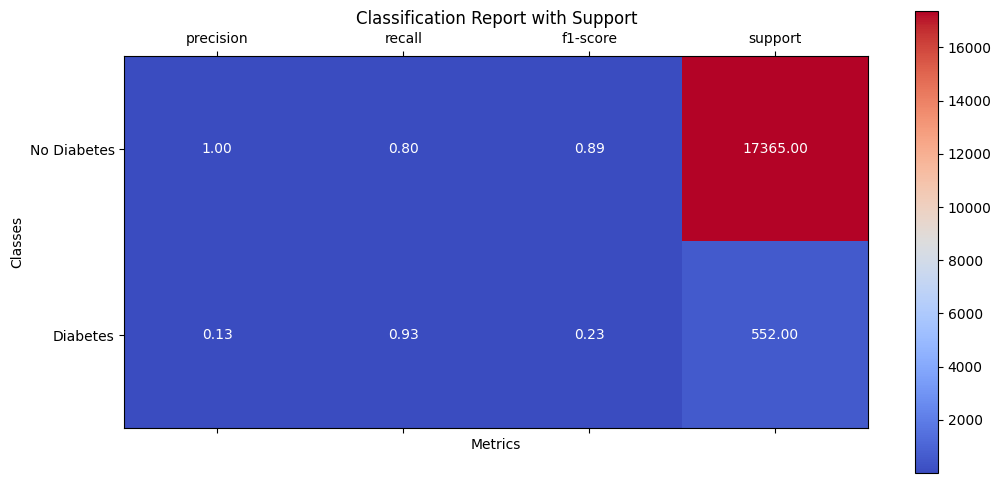

Plotting Confusion Matrix


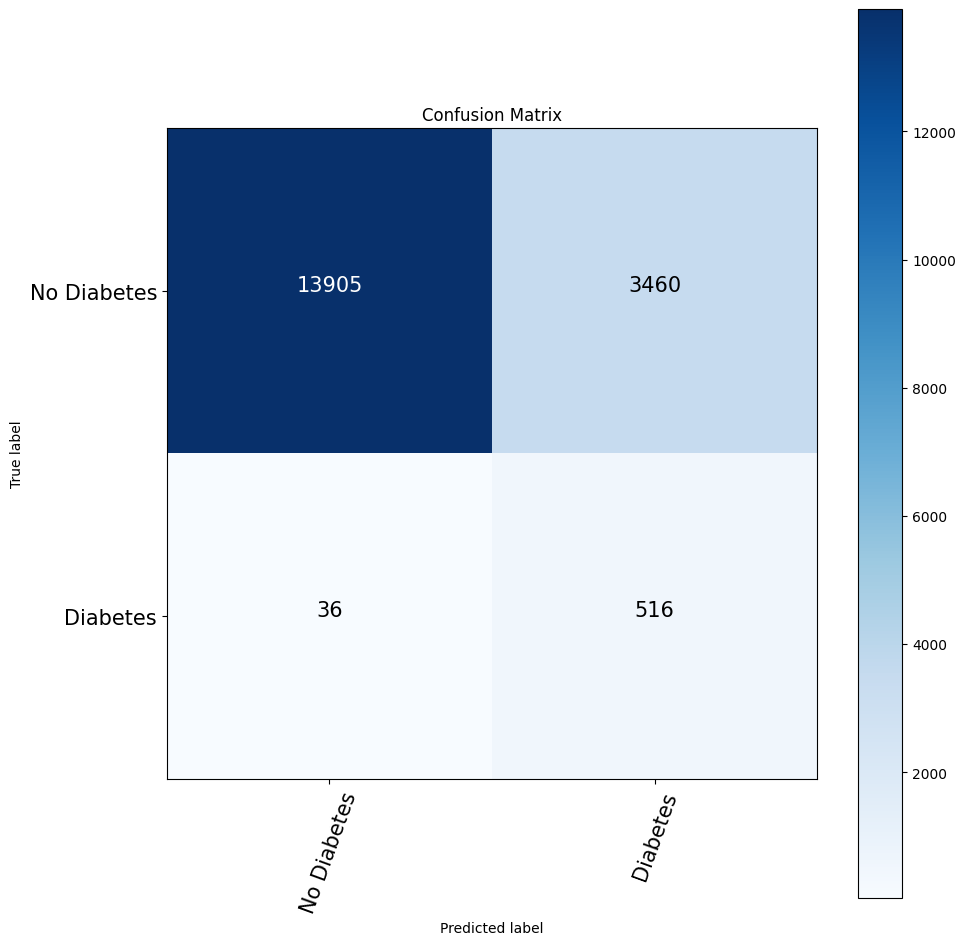

Calculating Accuracy, F1-Score, Recall, Precision


In [195]:
from evaluate_pipeline import classification_evaluation_pipeline 

classes = ["No Diabetes", "Diabetes"]
save_folder = "xgb_evaluation"

classification_evaluation_pipeline(y_pred=y_pred, y_true=y_test, classes=classes, metrics_average="macro", save_folder=save_folder)

In [198]:
from joblib import dump, load 

dump(final_pipeline, "final_model.pkl")

['final_model.pkl']

In [199]:
loaded_pipe = load("final_model.pkl")
y_pred = loaded_pipe.predict(X_test)
y_pred[:5]

array([1, 0, 1, 1, 0])

In [200]:
X_test.head()

,age,blood_glucose_level,bmi,HbA1c_level,smoking_history,hypertension,ages_bins
41705,80.0,130,41.38,6.1,0,0,1
14846,25.0,100,56.15,6.2,0,0,0
84464,64.0,200,27.32,6.1,1,0,1
1580,43.0,160,27.32,6.2,4,0,0
62104,66.0,160,27.32,3.5,0,0,1
